In [4]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import sklearn
from sklearn.datasets import make_blobs
%matplotlib inline

In [5]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [6]:
X

array([[ 5.18538175, -8.32988074],
       [ 1.59261757,  4.28903974],
       [ 6.51015396, -9.12196652],
       ...,
       [ 9.07047903, -3.12749613],
       [ 8.74660152, -3.09595889],
       [ 7.67882567, -2.42223716]])

In [7]:
y

array([2, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 1, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 0, 2, 2,
       0, 0, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1, 0, 0, 2,
       0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 1, 2, 1,
       2, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1,
       2, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0,
       1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1,
       0, 0, 2, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1,
       0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 1, 1, 1,
       1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1,
       0, 0, 2, 1, 0, 0, 2, 2, 2, 2, 1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 0, 2,
       1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 2, 1,
       2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 2,

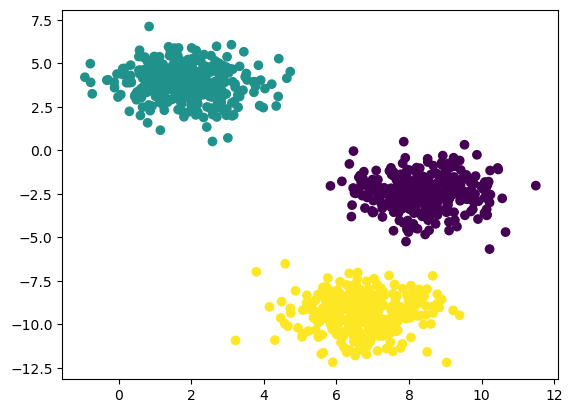

In [8]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [9]:
# find cluster using k means
## standardize--> feature scaling technique 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [12]:
scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)

In [16]:
##elow method to select k values 
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

In [17]:
wcss

[26501.263038191464,
 6738.102962823794,
 1277.5968428535157,
 1106.2635219004671,
 986.179341242147,
 899.8277002792105,
 750.8972044765261,
 664.0547408966577,
 577.0520784334299,
 543.2584124089262]

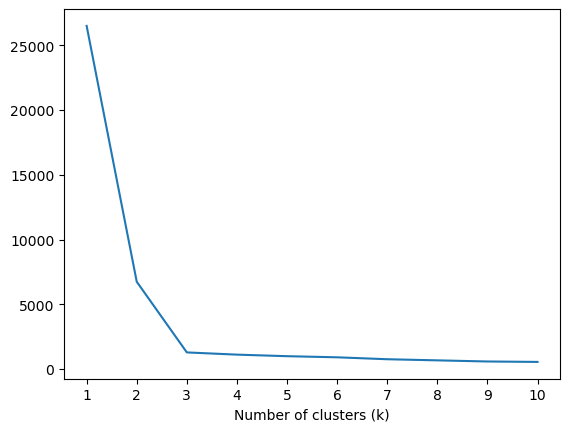

In [18]:
## plot elbow curve
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters (k)')
plt.show()

In [19]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [22]:
y_pred=kmeans.predict(X_test_scaled)

NotFittedError: This KMeans instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [23]:
y_pred

NameError: name 'y_pred' is not defined

In [24]:
plt.scatter(X_test[:0],X_test[:,1],c=y_pred)

NameError: name 'y_pred' is not defined

In [ ]:
##validilty the k value
## kneelocator 
## silhoutee scoring


In [25]:
##kneeloctor
!pip install kneed

In [27]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [30]:
## silhoutee score
from sklearn.metrics import silhouette_score
silhouette_coefficents=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficents.append(score)

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

In [31]:
silhouette_coefficents

[0.684387310450032,
 0.772579219179166,
 0.6093810445857715,
 0.45546874626025613,
 0.29173830045343874,
 0.32217251436353894,
 0.32729832127953906,
 0.3227734267910423,
 0.33299919201913175]

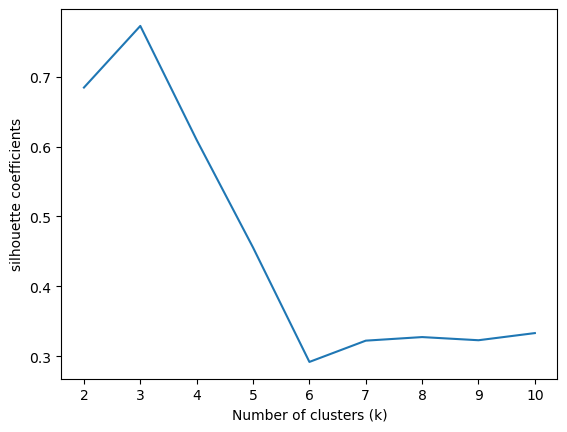

In [32]:
##ploting silhoutee score
plt.plot(range(2,11),silhouette_coefficents)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters (k)')
plt.ylabel('silhouette coefficients')
plt.show()